You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.


In [1]:
#Answer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

# Get descriptive statistics of the dataset
print(data.describe())

# Check the data types and missing values
print(data.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

                      -------------------------------------------------------------------

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.


In [2]:
#Answer

# Replace zero values with NaN for relevant columns
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Check the number of missing values in each column
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Remove outliers using z-score
from scipy.stats import zscore
z_scores = zscore(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# Transform categorical variable (if any) into dummy variables

# If there are categorical variables, you can use pd.get_dummies() to convert them into dummy variables.

# Example:
# data = pd.get_dummies(data, columns=['CategoricalVariable'])

# Check the updated dataset
print(data.head())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
6             3     78.0           50.0           32.0     88.0  31.0   
14            5    166.0           72.0           19.0    175.0  25.8   
16            0    118.0           84.0           47.0    230.0  45.8   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
14                     0.587   51        1  
16                     0.551   31  

                      -------------------------------------------------------------------

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


In [3]:
#Answer

from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (301, 8)
Test set shape: (76, 8)


                      -------------------------------------------------------------------

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.


In [4]:
#Answer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the decision tree classifier
tree = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(tree, params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


                       -------------------------------------------------------------------

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.


Accuracy: 0.7763157894736842
Precision: 0.7692307692307693
Recall: 0.6451612903225806
F1 Score: 0.7017543859649122
Confusion Matrix:
 [[39  6]
 [11 20]]
AUC Score: 0.8401433691756273


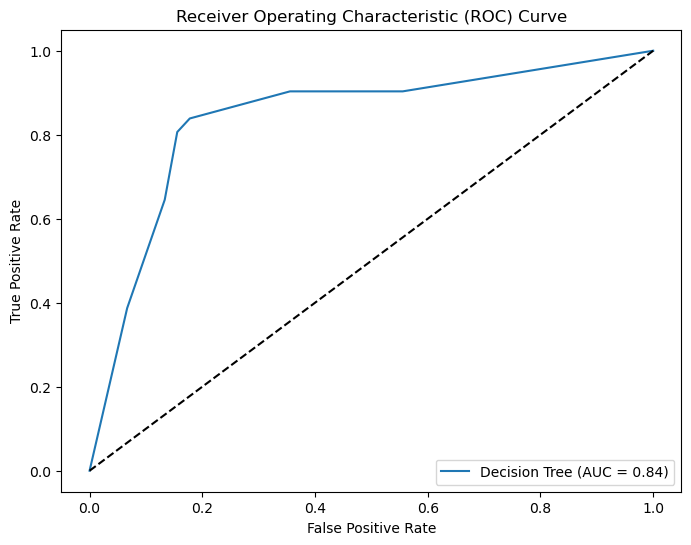

In [5]:
#Answer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Make predictions on the test set
y_pred = best_tree.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the ROC curve and AUC score
y_prob = best_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


                        -------------------------------------------------------------------

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.


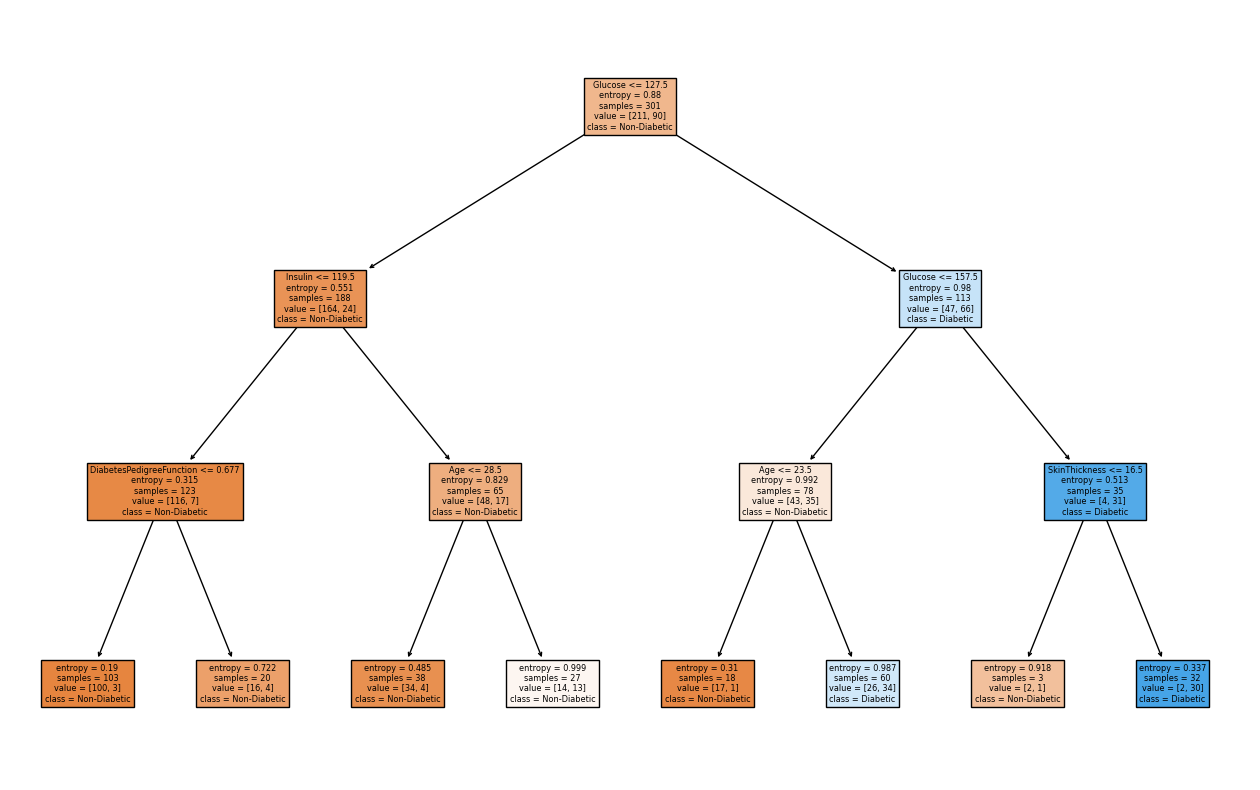

In [8]:
#Answer

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(best_tree, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()


                        -------------------------------------------------------------------

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

#Answer

We focus on validating the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Here are some explanations for the suggested validation approaches:

1. Applying the decision tree to new data: This approach involves obtaining a separate dataset with new patient information that was not used during the model training process. By using the trained decision tree model to predict the diabetes outcome for these new patients, we can assess how well the model generalizes to unseen data. Comparing the predicted outcomes with the actual outcomes in the new dataset allows us to evaluate the model's performance and assess its ability to make accurate predictions on previously unseen cases.

2. Testing robustness to changes in the dataset: This approach aims to assess how sensitive the decision tree model is to changes in the dataset. By introducing small variations or perturbations to the existing dataset, such as adding noise to certain features or swapping some labels, we can observe how these changes affect the model's predictions. If the decision tree model's predictions are significantly affected by minor changes in the dataset, it may indicate that the model is sensitive to the specific data distribution or noise present in the dataset. On the other hand, if the model's predictions remain relatively stable despite minor variations, it suggests that the model is more robust and capable of generalizing well to different variations of the data.

3. Scenario testing: Scenario testing involves analyzing different hypothetical situations or scenarios that may impact the decision tree model's performance. For example, one scenario could involve examining how the model performs when certain clinical variables have missing values. By intentionally introducing missing values in specific variables and evaluating the model's predictions, we can understand its ability to handle missing data and the robustness of its decision-making process. Additionally, we can explore scenarios where the distribution of the target variable (diabetes outcome) changes over time. By simulating such changes and assessing the model's predictions in different time periods, we can gain insights into its performance in dynamic environments.

Overall, the goal of validation and scenario testing is to assess the decision tree model's reliability, limitations, and generalizability. By evaluating its performance on new data and exploring various scenarios, we can understand the model's strengths and weaknesses, identify areas of improvement, and make informed decisions about its practical use in real-world healthcare applications.

                        -------------------------------------------------------------------